In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from collections import defaultdict
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from collections import Counter


from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
import datetime

from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import joblib
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv(r'Data/Processed/final_df_standard_scaler_box_cox.csv') 
df.shape

(87950, 24)

In [ ]:
categoriche_da_trasformare = [ 'explicit', 'genre']

# Applica il LabelEncoder a ciascuna colonna categorica
label_encoder = LabelEncoder()
for col in categoriche_da_trasformare:
    df[col] = label_encoder.fit_transform(df[col])



In [3]:
df = df.drop(columns=['Unnamed: 0', 'valence', 'energy'])

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous


In [4]:
# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Codifica le etichette di emozione nel DataFrame
df['mood'] = label_encoder.fit_transform(df['mood'])


In [5]:
# Costruisci il mapping
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Stampa il mapping
print("Mapping delle emozioni:")
for emotion, code in mapping.items():
    print(f"{emotion}: {code}")

# Decodifica un esempio
decoded_code = 1  # Esempio di codice da decodificare
decoded_emotion = label_encoder.inverse_transform([decoded_code])[0]
print(f"\nDecodificato il codice {decoded_code}: {decoded_emotion}")

Mapping delle emozioni:
angry: 0
bored: 1
calm: 2
excited: 3
happy: 4
nervous: 5
peaceful: 6
pleased: 7
relaxed: 8
sad: 9
sleepy: 10

Decodificato il codice 1: bored


In [6]:
attributes = [col for col in df.columns if col != "mood"]

X = df[attributes].values
y = np.array(df["mood"])  # oppure y = df['emotion].values

X.shape, y.shape

((87950, 20), (87950,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Usando l'opzione stratify=y, garantisci che la suddivisione mantenga la stessa proporzione di classi tra set di addestramento e di test, utile quando hai un set di dati sbilanciato

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70360, 20), (17590, 20), (70360,), (17590,))

## CLASSIFICATION

SVM

In [8]:
#25

from sklearn.svm import SVC

clf =SVC(C = 1, degree= 2, kernel= 'rbf',  gamma= 0.04781374425325464, random_state=42, probability=True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred, target_names=mapping))

Accuracy 0.47737350767481523
F1-score 0.4592356940439056
              precision    recall  f1-score   support

       angry       0.58      0.52      0.55      1970
       bored       0.56      0.34      0.42      1429
        calm       0.40      0.70      0.51      3683
     excited       0.45      0.49      0.47      2662
       happy       0.48      0.49      0.48      2350
     nervous       0.45      0.23      0.31      1415
    peaceful       0.88      0.17      0.28        90
     pleased       0.52      0.23      0.32      1768
     relaxed       0.58      0.12      0.20       627
         sad       0.68      0.81      0.74      1185
      sleepy       0.43      0.20      0.27       411

    accuracy                           0.48     17590
   macro avg       0.55      0.39      0.41     17590
weighted avg       0.50      0.48      0.46     17590



In [9]:
bb = clf

### SCEGLO CLF

In [10]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

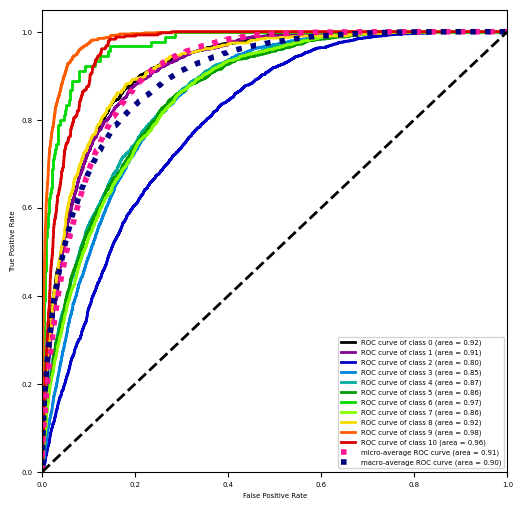

In [31]:
from scikitplot.metrics import plot_roc

y_score = bb.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(6,6), title_fontsize=15, text_fontsize=5)
plt.title("")
plt.show()

array([[1090,   13,   23,  425,  138,  238,    0,   35,    4,    4,    0],
       [   6,  732,  104,    0,    2,  192,   26,   52,  105,  112,   98],
       [  75,  537,  663,  125,  334,  552,   46,  707,  458,   27,  159],
       [ 588,    6,   73,  919,  649,  255,    0,  161,   10,    0,    1],
       [ 155,    9,   68,  381, 1141,  156,    0,  404,   36,    0,    0],
       [  99,  134,  160,   78,   71,  690,    6,  142,   28,    5,    2],
       [   0,    2,    1,    0,    0,    0,   51,    0,   11,    3,   22],
       [  17,   66,  213,   31,  236,  127,    7,  811,  255,    0,    5],
       [   2,   42,   42,    1,    6,    9,   75,   86,  313,    3,   48],
       [   4,  113,    2,    0,    0,    3,   70,    0,   12,  734,  247],
       [   0,   30,    2,    0,    0,    0,   90,    0,   29,   65,  195]],
      dtype=int64)

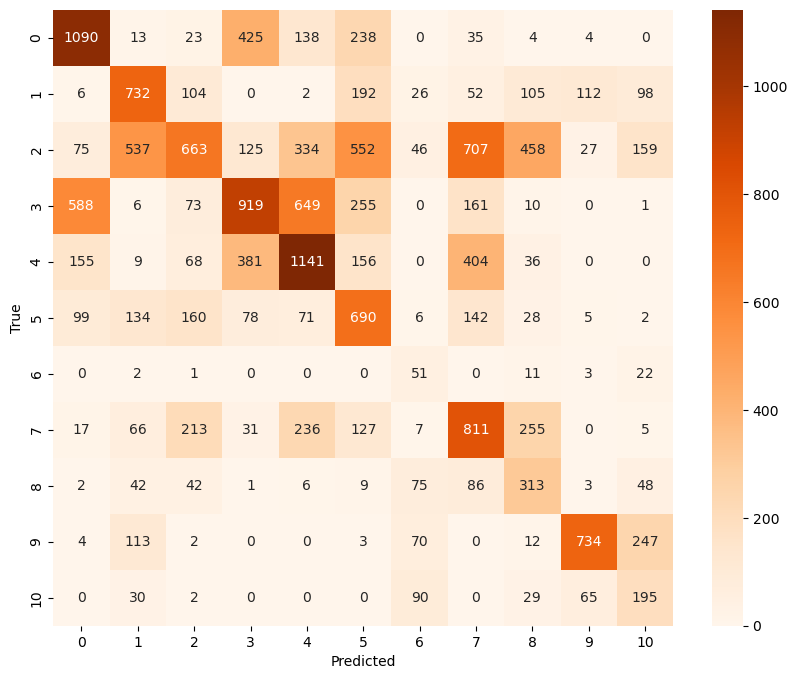

In [94]:
cm = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('True')
cm

In [11]:
feature_names = [x for x in df.columns if x != 'mood']

In [33]:
mapping

{'angry': 0,
 'bored': 1,
 'calm': 2,
 'excited': 3,
 'happy': 4,
 'nervous': 5,
 'peaceful': 6,
 'pleased': 7,
 'relaxed': 8,
 'sad': 9,
 'sleepy': 10}

## Local

In [34]:
i2e =0
x = X_test[i2e]
x

array([ 0.42412425, -0.44389828,  0.16281975, -1.31579576, -0.36564622,
       -0.61598651, -0.47162147, -0.85337931, -0.71441561, -0.03706018,
        0.77411277,  0.5185329 , -0.10468738,  1.17007182,  0.28575777,
        0.        ,  2.        ,  0.        ,  4.        ,  0.01022172])

In [35]:
df_test = pd.DataFrame(X_test, columns = feature_names)
df_test['mood'] = y_test

In [36]:
df_test[df_test['mood']==1]

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
12,-0.695737,-1.022645,-1.876549,-0.127067,1.960826,-0.572436,1.661821,-0.633304,-1.401355,-2.020647,...,-2.398338,-0.854449,-0.311347,-0.288926,0.0,6.0,0.0,4.0,0.009210,9
15,-1.323641,-1.349265,-0.720978,-0.661090,1.761754,-0.612197,0.721353,-0.678411,-1.344940,-1.800768,...,0.106545,-1.432274,-1.080185,-0.306363,0.0,4.0,1.0,4.0,0.009915,9
35,-0.529275,-2.432267,-2.088335,-0.344683,1.755812,1.870623,-0.690879,0.643690,-1.484319,-1.687179,...,1.694070,-1.169631,0.213713,-0.286858,0.0,4.0,0.0,3.0,0.010483,9
39,-0.681228,0.891231,-1.534240,-0.098581,1.797409,1.868495,-1.140850,-0.016670,0.082036,-0.872436,...,0.353738,-0.556295,-0.348851,-0.305985,0.0,0.0,1.0,4.0,0.010483,9
51,1.613312,-2.048345,-1.974792,-0.013678,1.981625,1.490087,-0.756272,1.788532,-1.431222,-2.021567,...,0.436135,1.997687,-0.652636,-0.302837,0.0,5.0,1.0,4.0,0.009210,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,4.650162,-0.501200,-1.658706,0.118348,1.937057,0.547232,0.512888,-0.301659,-1.258657,-1.314944,...,-0.695457,3.569754,-1.699005,-0.305977,0.0,0.0,1.0,4.0,0.006299,9
17511,1.008772,-1.188820,-2.205452,-1.000478,1.981625,1.870711,-0.212389,0.322050,-0.843839,0.432036,...,0.419656,1.080639,0.326226,-0.301563,0.0,2.0,1.0,4.0,0.010483,9
17515,2.198657,-2.180139,-1.988188,-0.230705,1.690445,1.751087,-0.577238,-1.959481,-1.427903,-1.999208,...,-0.981101,0.440296,0.213713,-0.292875,0.0,2.0,0.0,4.0,0.010733,9
17547,0.778898,-1.412297,-1.439511,0.184426,1.853862,-0.112617,-0.709974,1.616898,-1.431222,-1.932925,...,1.315042,1.208621,0.326226,-0.266927,0.0,11.0,0.0,3.0,0.006299,9


In [37]:
df_test[df_test['emotion']== 4]

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
3,-0.412647,1.326724,1.041304,-0.066918,-0.083379,-0.616040,1.255057,-0.670629,0.264556,0.296226,...,0.046121,-0.645311,-1.530236,-0.305888,0.0,4.0,1.0,4.0,0.010483,4
5,-0.098640,0.868310,1.276963,1.825147,0.519780,-0.616040,1.076346,-0.480603,0.672737,0.787971,...,-0.497703,-0.329257,-0.348851,-0.288183,1.0,6.0,0.0,4.0,0.011120,4
8,-0.669811,0.564611,1.284711,1.459654,-0.122005,-0.616040,1.402081,-1.529572,-0.926803,0.787971,...,-0.536155,-1.387867,-0.630133,-0.232057,0.0,4.0,1.0,4.0,0.009812,4
14,-0.718271,-0.174580,-0.426285,0.591928,1.235846,-0.614984,0.935354,1.535006,0.370749,0.502616,...,0.062600,0.058254,0.888790,-0.059436,0.0,10.0,1.0,4.0,0.008164,4
33,-0.617529,-1.400836,2.280421,0.101934,-0.941976,-0.615959,0.581883,0.586692,0.682693,-1.134669,...,0.842630,-0.300817,-0.123826,-0.277179,0.0,2.0,1.0,4.0,0.006549,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17559,-0.397147,0.060357,-0.208852,-0.131197,0.920896,-0.616040,1.120793,2.129778,-0.750920,0.787971,...,0.161477,0.647431,0.438738,0.061369,0.0,9.0,1.0,4.0,0.010802,4
17568,0.731782,0.587532,0.696906,-0.098581,-0.285423,-0.616040,-0.852197,-0.888986,-0.054025,-0.451343,...,0.556985,0.136168,-0.011313,-0.255575,0.0,3.0,1.0,4.0,0.009255,4
17572,-0.481400,-0.019866,1.031768,0.702627,-0.160631,-0.600515,0.438781,1.401270,-0.744283,0.032992,...,0.172463,0.294689,0.101200,-0.258063,0.0,1.0,0.0,4.0,0.010222,4
17573,-0.075662,0.358325,1.210481,-0.055282,-0.800931,-0.616040,1.203323,0.598146,1.173838,-0.355887,...,-0.140647,0.290155,-0.376979,-0.294939,0.0,6.0,0.0,4.0,0.010301,4


In [38]:
#prendo istanze 3(happy) e 12(sad) e droppo emotion

esempio1 = df_test.loc[[1]].drop('mood', axis=1).values.squeeze() #happy
esempio2 = df_test.loc[[3]].drop('mood', axis=1).values.squeeze() #sad
esempio1

array([-0.41264719,  1.32672379,  1.0413035 , -0.06691848, -0.08337943,
       -0.61604048,  1.25505746, -0.67062912,  0.26455581,  0.29622634,
        0.7095383 ,  0.04612068, -0.6453106 , -1.53023586, -0.30588779,
        0.        ,  4.        ,  1.        ,  4.        ,  0.01048323])

### LIME

fitto su train , ma la singola x la prendo da test

In [39]:
from lime.lime_tabular import LimeTabularExplainer

In [40]:
lime_explainer = LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=mapping, 
    discretize_continuous=False
)

In [41]:
#1

exp = lime_explainer.explain_instance(esempio1, bb_predict_proba, top_labels= 1)

In [42]:
exp.local_exp

{4: [(2, 0.09270134462342608),
  (8, 0.03938697556972502),
  (1, 0.02935775405730584),
  (9, 0.025974040282339274),
  (7, 0.014453440089564602),
  (10, 0.014406271787095038),
  (15, -0.012242432150116295),
  (5, -0.011932627118432992),
  (6, 0.010878658192158353),
  (13, -0.0071495145092624465)]}

In [43]:
exp.show_in_notebook(show_predicted_value=True, show_table = True)

In [44]:
#2

exp = lime_explainer.explain_instance(esempio2, bb_predict_proba, top_labels= 1)

In [45]:
exp.local_exp

{9: [(2, -0.04521063932527191),
  (4, 0.021387736333242802),
  (8, -0.011448263046450946),
  (1, -0.008759646232719557),
  (11, 0.006175892972470357),
  (6, -0.005302675168837346),
  (7, -0.0044456204259311505),
  (9, -0.0036676946606160102),
  (0, 0.0032291479867966933),
  (12, -0.002026026040356717)]}

In [46]:
exp.show_in_notebook(show_predicted_value=True, show_table = True)

## SHAP

global

In [12]:
import shap
shap.initjs()

In [13]:
import shap
import matplotlib.pyplot as plt

In [14]:
inverse_class_mapping = {v: k for k, v in mapping.items()}
inverse_class_mapping

{0: 'angry',
 1: 'bored',
 2: 'calm',
 3: 'excited',
 4: 'happy',
 5: 'nervous',
 6: 'peaceful',
 7: 'pleased',
 8: 'relaxed',
 9: 'sad',
 10: 'sleepy'}

In [15]:
med = np.median(X_train, axis=0).reshape((1, X_train.shape[1]))
explainer = shap.KernelExplainer(bb.predict_proba, med)

In [16]:
# 55 min per nsamples = 20
# 360 min per nsamples = 100

#mettere in report The "auto" setting uses nsamples = 2 * X.shape[1] + 2048. definire meglio cosa sono --> colaitions??

shap_values = explainer.shap_values(X_test, nsamples=100, approximate = True, n_jobs = -1)

  0%|          | 0/17590 [00:00<?, ?it/s]

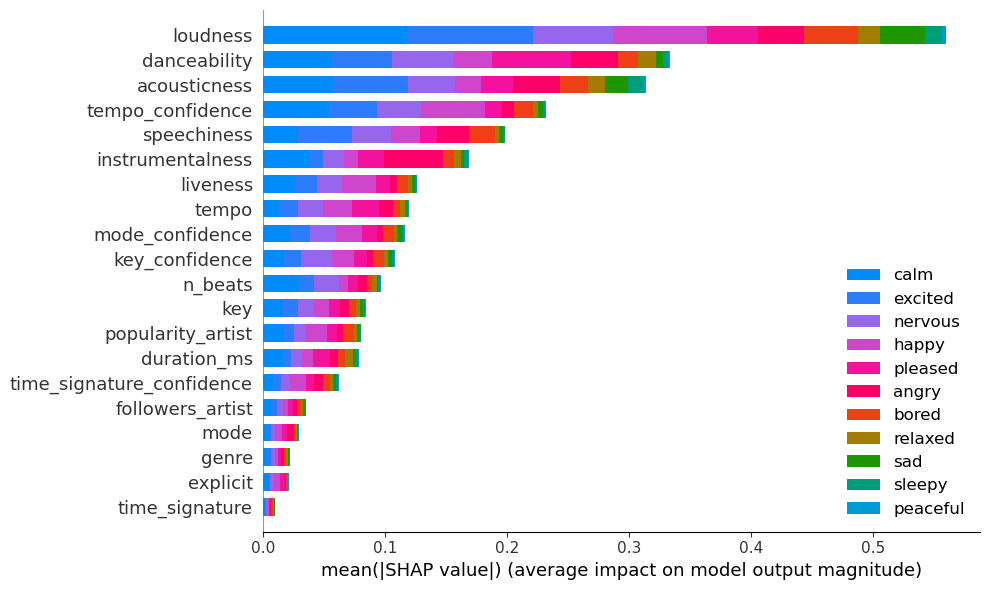

In [17]:
# Create the SHAP summary plot with class labels and colors

shap.summary_plot(shap_values,
                  features=X_test,
                  feature_names=feature_names,
                  plot_type='bar',
                  max_display = 20,
                  class_names = inverse_class_mapping,
                  plot_size=(10, 6))

# Show the plot
plt.show()